### Let's write an elementary tokenizer that uses words as tokens.

We will use Mark Twain's _Life On The Mississippi_ as a test bed. The text is in the accompanying file 'Life_On_The_Mississippi.txt'

Here's a not-terribly-good such tokenizer:

In [5]:
wdict = {}
with open('Life_On_The_Mississippi.txt', 'r') as L:
    line = L.readline()
    nlines = 1
    while line:
        line = line.translate(translator)
        line = re.sub(r'[^\x00-\x7F]+', '', line)
        line = line.lower()

        words = line.split()
        for word in words:
            if wdict.get(word) is not None:
                wdict[word] += 1
            else:
                wdict[word] = 1
        line = L.readline()
        nlines += 1

nitem = 0 ; maxitems = 100
for item in wdict.items():
    nitem += 1
    print(item)
    if nitem == maxitems: break


('the', 9255)
('project', 90)
('gutenberg', 87)
('ebook', 13)
('of', 4532)
('life', 89)
('on', 947)
('mississippi', 159)
('this', 781)
('is', 1148)
('for', 1095)
('use', 48)
('anyone', 5)
('anywhere', 18)
('in', 2593)
('united', 37)
('states', 54)
('and', 5892)
('most', 124)
('other', 270)
('parts', 9)
('world', 68)
('at', 750)
('no', 422)
('cost', 25)
('with', 1081)
('almost', 38)
('restrictions', 2)
('whatsoever', 2)
('you', 1033)
('may', 89)
('copy', 17)
('it', 2293)
('give', 81)
('away', 172)
('or', 581)
('reuse', 2)
('under', 119)
('terms', 26)
('license', 24)
('included', 3)
('online', 4)
('wwwgutenbergorg', 5)
('if', 381)
('are', 387)
('not', 722)
('located', 9)
('will', 301)
('have', 571)
('to', 3592)
('check', 4)
('laws', 17)
('country', 77)
('where', 174)
('before', 208)
('using', 11)
('title', 3)
('author', 3)
('mark', 24)
('twain', 26)
('release', 1)
('date', 18)
('july', 7)
('10', 10)
('2004', 1)
('245', 1)
('recently', 4)
('updated', 2)
('january', 3)
('1', 13)
('2021', 1

This is unsatisfactory for a few reasons:

* There are non-ASCII (Unicode) characters that should be stripped (the so-called "Byte-Order Mark" or BOM \ufeff at the beginning of the text);

* There are punctuation marks, which we don't want to concern ourselves with;

* The same word can appear capitalized, or lower-case, or with its initial letter upper-cased, whereas we want them all to be normalized to lower-case.

Part 1 of this assignment: insert code in this loop to operate on the str variable 'line' so as to fix these problems before 'line' is split into words.

A hint to one possible way to do this: use the 'punctuation' character definition in the Python 'string' module, the 'maketrans' and 'translate' methods of Python's str class, to eliminate punctuation, and the regular expression ('re') Python module to eliminate any Unicode---it is useful to know that the regular expression r'[^\x00-x7f]' means "any character not in the vanilla ASCII set.

Part 2: Add code to sort the contents of wdict by word occurrence frequency.  What are the top 100 most frequent word tokens?  Adding up occurrence frequencies starting from the most frequent words, how many distinct words make up the top 90% of word occurrences in this "corpus"?

For this part, the docs of Python's 'sorted' and of the helper 'itemgetter' from 'operator' reward study.

Write your modified code in the cell below.

In [20]:
from operator import itemgetter
sorted_wdict = sorted(wdict.items(), key=itemgetter(1), reverse=True)

wdict_top_100 = sorted_wdict[:100]

The top 100 most frequent word tokens are:

In [21]:
wdict_top_100

[('the', 9255),
 ('and', 5892),
 ('of', 4532),
 ('a', 4053),
 ('to', 3592),
 ('in', 2593),
 ('it', 2293),
 ('i', 2205),
 ('was', 2093),
 ('that', 1724),
 ('he', 1402),
 ('is', 1148),
 ('for', 1095),
 ('with', 1081),
 ('you', 1033),
 ('his', 961),
 ('had', 961),
 ('but', 952),
 ('on', 947),
 ('as', 881),
 ('this', 781),
 ('they', 758),
 ('at', 750),
 ('not', 722),
 ('all', 720),
 ('by', 713),
 ('one', 686),
 ('there', 627),
 ('were', 625),
 ('be', 617),
 ('my', 582),
 ('or', 581),
 ('from', 577),
 ('have', 571),
 ('out', 541),
 ('so', 536),
 ('up', 529),
 ('him', 523),
 ('we', 519),
 ('me', 516),
 ('when', 505),
 ('would', 478),
 ('which', 476),
 ('river', 457),
 ('an', 440),
 ('them', 425),
 ('no', 422),
 ('then', 405),
 ('said', 399),
 ('are', 387),
 ('if', 381),
 ('their', 378),
 ('now', 369),
 ('about', 346),
 ('time', 337),
 ('been', 335),
 ('down', 328),
 ('its', 323),
 ('could', 313),
 ('has', 305),
 ('will', 301),
 ('into', 300),
 ('what', 285),
 ('her', 278),
 ('two', 273),
 ('

In [28]:
wdict_top_100 = {word: freq for word, freq in wdict_top_100}

ValueError: too many values to unpack (expected 2)

In [29]:
tot = 0
for item in wdict_top_100:
    tot+=wdict_top_100[item]

In [33]:
print('word\toccurence\tshare\trolling share')
c = 0
for item in wdict_top_100:
    c += wdict_top_100[item]/tot
    print(f'{item}\t{wdict_top_100[item]}\t\t{round(wdict_top_100[item]/tot,2)}\t{round(c,2)}')

word	occurence	share	rolling share
the	9255		0.12	0.12
and	5892		0.08	0.19
of	4532		0.06	0.25
a	4053		0.05	0.31
to	3592		0.05	0.35
in	2593		0.03	0.38
it	2293		0.03	0.41
i	2205		0.03	0.44
was	2093		0.03	0.47
that	1724		0.02	0.49
he	1402		0.02	0.51
is	1148		0.01	0.52
for	1095		0.01	0.54
with	1081		0.01	0.55
you	1033		0.01	0.57
his	961		0.01	0.58
had	961		0.01	0.59
but	952		0.01	0.6
on	947		0.01	0.61
as	881		0.01	0.63
this	781		0.01	0.64
they	758		0.01	0.65
at	750		0.01	0.66
not	722		0.01	0.66
all	720		0.01	0.67
by	713		0.01	0.68
one	686		0.01	0.69
there	627		0.01	0.7
were	625		0.01	0.71
be	617		0.01	0.72
my	582		0.01	0.72
or	581		0.01	0.73
from	577		0.01	0.74
have	571		0.01	0.75
out	541		0.01	0.75
so	536		0.01	0.76
up	529		0.01	0.77
him	523		0.01	0.77
we	519		0.01	0.78
me	516		0.01	0.79
when	505		0.01	0.79
would	478		0.01	0.8
which	476		0.01	0.81
river	457		0.01	0.81
an	440		0.01	0.82
them	425		0.01	0.82
no	422		0.01	0.83
then	405		0.01	0.83
said	399		0.01	0.84
are	387		0.0	0.84
if	381		

90% of this corpus are articles, pronouns and prepositions.

## HW 2

One interesting cluster I have found ties together various professions, academic fields and industries:

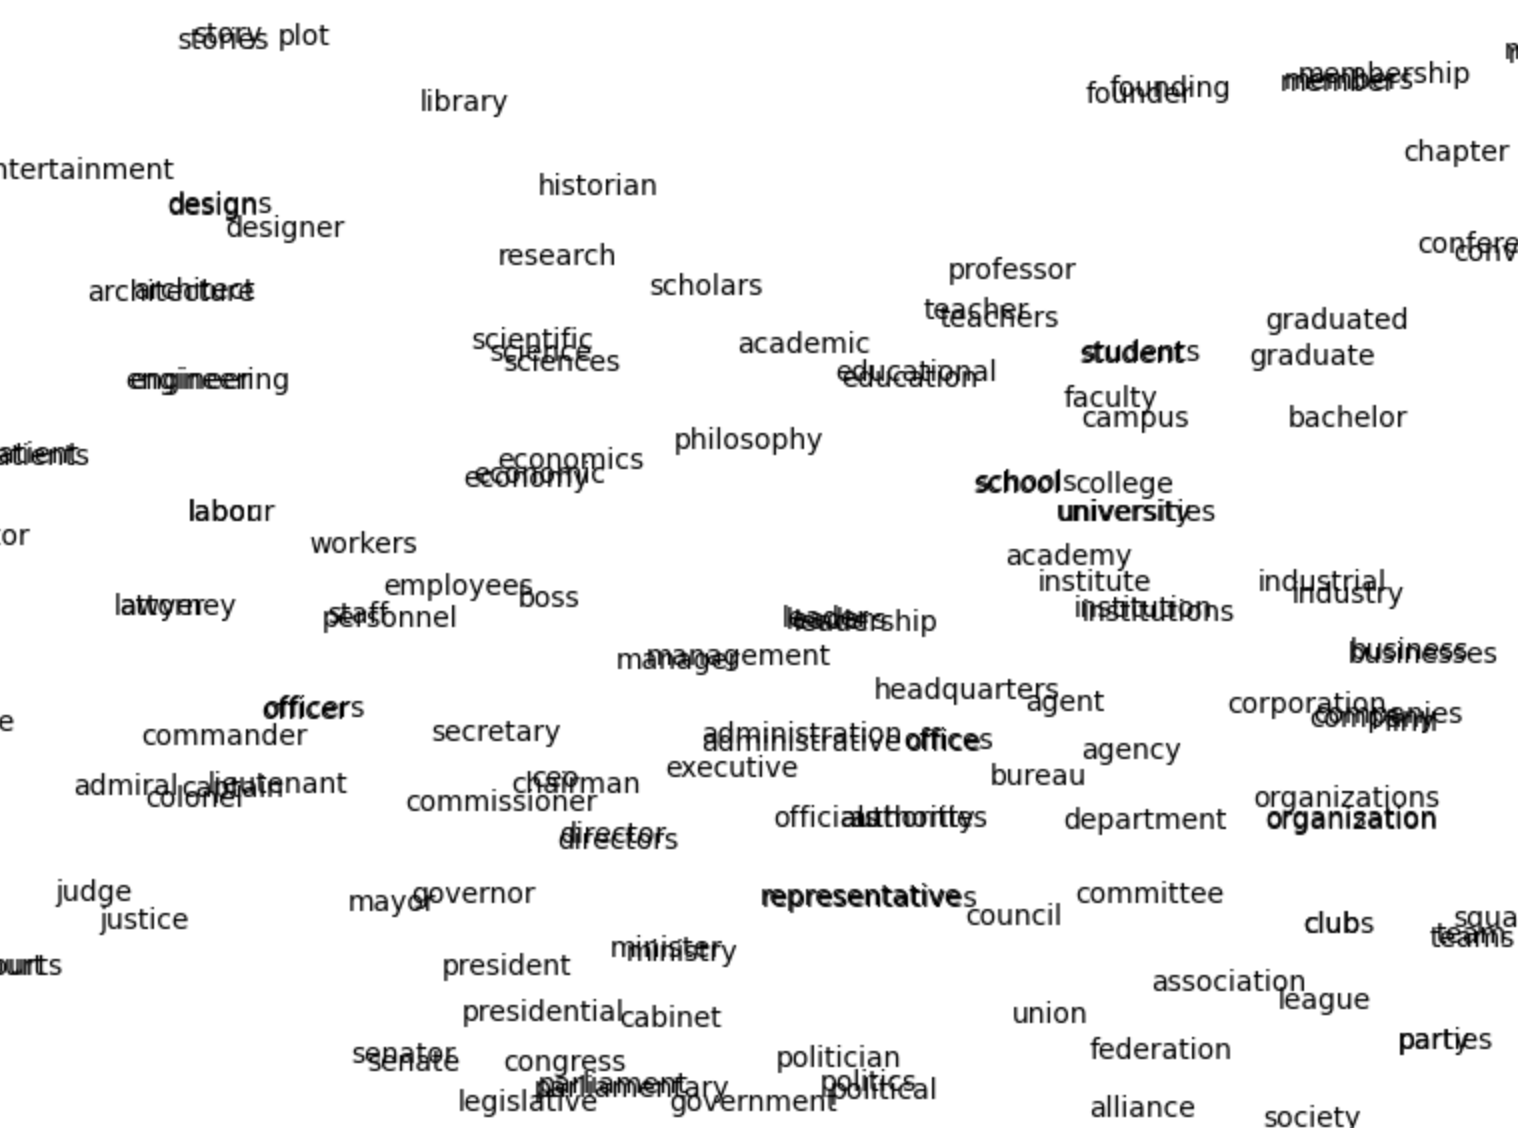

In [1]:
from IPython.display import Image

Image(filename='professions_cluster.png')